## Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [118]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data
import os
import math
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

In [130]:
titanic_df = acquire.get_titanic_data()
def prep_titanic(titanic_df):
    titanic_df = titanic_df.drop_duplicates()
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')
    dummy_titanic_df = pd.get_dummies(titanic_df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
    titanic_df = pd.concat([titanic_df, dummy_titanic_df], axis=1)
    cols_to_drop = ['deck', 'embarked', 'class', 'age', 'sex', 'embark_town']
    titanic_df = titanic_df.drop(columns=cols_to_drop)
    return titanic_df
def split_data_titanic(titanic_df):
    train_titanic, test_titanic = train_test_split(titanic_df, test_size=.2, random_state=123, stratify=titanic_df.survived)
    train_titanic, validate_titanic = train_test_split(train_titanic, test_size=.25, random_state=123, stratify=train_titanic.survived)
    return train_titanic, validate_titanic, test_titanic


In [131]:
titanic_df = prep_titanic(titanic_df)

In [132]:
titanic_df['baseline'] = 0
titanic_df

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
0,0,0,3,1,0,7.2500,0,1,0,1,0
1,1,1,1,1,0,71.2833,0,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1,0
3,3,1,1,1,0,53.1000,0,0,0,1,0
4,4,0,3,0,0,8.0500,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,0,0,13.0000,1,1,0,1,0
887,887,1,1,0,0,30.0000,1,0,0,1,0
888,888,0,3,1,2,23.4500,0,0,0,1,0
889,889,1,1,0,0,30.0000,1,1,0,0,0


In [133]:
train_titanic, validate_titanic, test_titanic = split_data_titanic(titanic_df)

In [134]:
train_titanic.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
455,455,1,3,0,0,7.8958,1,1,0,0,0
380,380,1,1,0,0,227.5250,1,0,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1,0
55,55,1,1,0,0,35.5000,1,1,0,1,0
243,243,0,3,0,0,7.1250,1,1,0,1,0


In [135]:
print('Baseline Accuracy', accuracy_score(train_titanic.survived, train_titanic.baseline))

Baseline Accuracy 0.6161048689138576


### Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [159]:
X_cols = ['pclass', 'fare', 'parch', 'sex_male']

In [162]:
x_train_titanic = train_titanic[X_cols]
y_train_titanic = train_titanic.survived

X_validate_titanic = validate_titanic[X_cols]
y_validate_titanic = validate_titanic.survived

X_test_titanic = test_titanic[X_cols]
y_test_titanic = test_titanic.survived

In [163]:
train_titanic.dtypes

passenger_id                 int64
survived                     int64
pclass                       int64
sibsp                        int64
parch                        int64
fare                       float64
alone                        int64
sex_male                     uint8
embark_town_Queenstown       uint8
embark_town_Southampton      uint8
baseline                     int64
dtype: object

In [164]:
model1 = DecisionTreeClassifier(max_depth=3, random_state=123)
model1 = model1.fit(x_train_titanic, y_train_titanic)

In [165]:
y_pred = model1.predict(x_train_titanic)
y_pred[0:5]

array([0, 1, 0, 0, 0])

In [166]:
y_pred_proba = model1.predict_proba(x_train_titanic)
y_pred_proba[0:5]

array([[0.89814815, 0.10185185],
       [0.01785714, 0.98214286],
       [0.69105691, 0.30894309],
       [0.69105691, 0.30894309],
       [0.89814815, 0.10185185]])

In [167]:
print(f'training score: {model1.score(x_train_titanic, y_train_titanic):.2%}')
print(f'validate score: {model1.score(X_validate_titanic, y_validate_titanic):.2%}')

training score: 81.84%
validate score: 79.21%


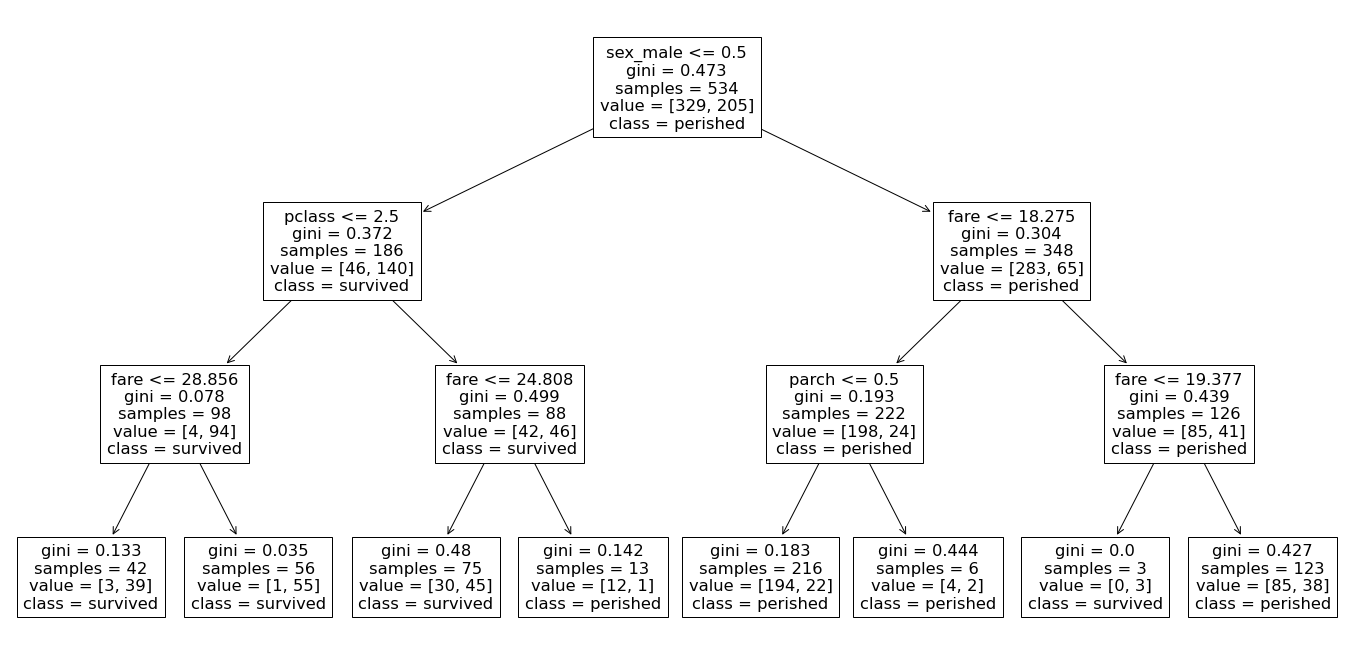

In [168]:
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=x_train_titanic.columns.to_list(), class_names=['perished', 'survived']);

### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [169]:
print(f'training score: {model1.score(x_train_titanic, y_train_titanic):.2%}')
print(f'validate score: {model1.score(X_validate_titanic, y_validate_titanic):.2%}')

training score: 81.84%
validate score: 79.21%


In [170]:
y_pred = model1.predict(X_validate_titanic)
confusion_matrix(y_validate_titanic, y_pred)

array([[95, 15],
       [22, 46]])

In [171]:
print(classification_report(y_validate_titanic, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



### Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [172]:
print(classification_report(y_validate_titanic, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



In [173]:
accuracy_score(y_validate_titanic, y_pred)

0.7921348314606742

In [174]:
confusion_matrix(y_validate_titanic, y_pred)

array([[95, 15],
       [22, 46]])

In [204]:
TN = 95
FP = 15
FN = 22
TP = 46

In [205]:
# Recall or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

In [206]:
print('TPR', round(TPR, 2))
print('FPR', round(FPR, 2))
print('TNR', round(TNR, 2))
print('FNR', round(FNR, 2))

TPR 0.68
FPR 0.14
TNR 0.86
FNR 0.32


### Run through steps 2-4 using a different max_depth value.



In [178]:
model2 = DecisionTreeClassifier(max_depth=10, random_state=123)
model2 = model2.fit(x_train_titanic, y_train_titanic)
y_pred = model2.predict(x_train_titanic)
y_pred_proba = model2.predict_proba(x_train_titanic)
print(f'training score: {model2.score(x_train_titanic, y_train_titanic):.2%}')
print(f'validate score: {model2.score(X_validate_titanic, y_validate_titanic):.2%}')
y_pred = model2.predict(X_validate_titanic)
confusion_matrix(y_validate_titanic, y_pred)

training score: 91.57%
validate score: 76.97%


array([[91, 19],
       [22, 46]])

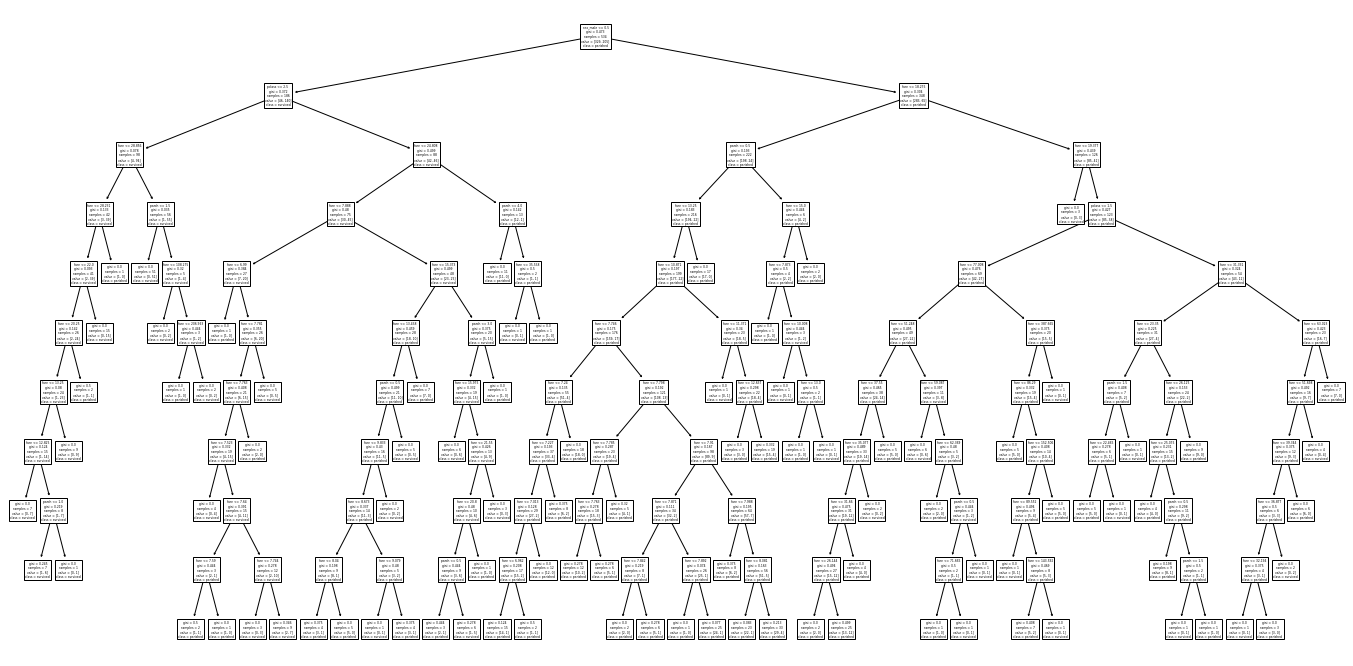

In [179]:
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=x_train_titanic.columns.to_list(), class_names=['perished', 'survived']);

In [207]:
TN = 91
FP = 19
FN = 22
TP = 46
# Recall or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

In [208]:
print('TPR', round(TPR, 2))
print('FPR', round(FPR, 2))
print('TNR', round(TNR, 2))
print('FNR', round(FNR, 2))

TPR 0.68
FPR 0.17
TNR 0.83
FNR 0.32


In [182]:
print(f'model 1 training score: {model1.score(x_train_titanic, y_train_titanic):.2%}')
print(f'model 1 validate score: {model1.score(X_validate_titanic, y_validate_titanic):.2%}')
print(f'model 2 training score: {model2.score(x_train_titanic, y_train_titanic):.2%}')
print(f'model 2 validate score: {model2.score(X_validate_titanic, y_validate_titanic):.2%}')

model 1 training score: 81.84%
model 1 validate score: 79.21%
model 2 training score: 91.57%
model 2 validate score: 76.97%


- Model 1 performed better in the validate set
- Model 2 performed better in the train set

## Work through these same exercises using the Telco dataset.


In [31]:
telco_df = acquire.get_telco_data()
def prep_telco(telco_df):
    telco_df = telco_df.T.drop_duplicates().T
    dummy_telco_df = pd.get_dummies(telco_df[['gender','contract_type','internet_service_type']], dummy_na=False, drop_first=[True, False, False])
    telco_df = pd.concat([telco_df, dummy_telco_df], axis=1)
    telco_df.senior_citizen = telco_df.senior_citizen.astype('int')
    telco_df.tenure = telco_df.tenure.astype('int')
    telco_df.monthly_charges = telco_df.monthly_charges.astype('float')
    telco_df.partner = telco_df.partner.map(dict(Yes=1, No=0))
    telco_df.dependents = telco_df.dependents.map(dict(Yes=1, No=0))
    telco_df.phone_service = telco_df.phone_service.map(dict(Yes=1, No=0))
    telco_df.paperless_billing = telco_df.paperless_billing.map(dict(Yes=1, No=0))
    telco_df.churn = telco_df.churn.map(dict(Yes=1, No=0))
    cols_to_drop = ['internet_service_type_id', 'contract_type_id', 'payment_type_id', 'gender']
    telco_df = telco_df.drop(columns=cols_to_drop)
    telco_df.total_charges = telco_df.total_charges.str.replace(' ', '0')
    telco_df.total_charges = telco_df.total_charges.astype('float')
    return telco_df
def split_data_telco(telco_df):
    train_telco, test_telco = train_test_split(telco_df, test_size=.2, random_state=123, stratify=telco_df.churn)
    train_telco, validate_telco = train_test_split(train_telco, test_size=.25, random_state=123, stratify=train_telco.churn)
    return train_telco, validate_telco, test_telco

In [32]:
telco_df = prep_telco(telco_df)

In [33]:
telco_df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [34]:
telco_df['baseline'] = 0
telco_df

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,contract_type,internet_service_type,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,baseline
0,0002-ORFBO,0,1,1,9,1,No,No,Yes,No,...,593.30,0,One year,DSL,0,1,0,0,0,0
1,0003-MKNFE,0,0,0,9,1,Yes,No,No,No,...,542.40,0,Month-to-month,DSL,1,0,0,0,0,0
2,0004-TLHLJ,0,0,0,4,1,No,No,No,Yes,...,280.85,1,Month-to-month,Fiber optic,1,0,0,1,0,0
3,0011-IGKFF,1,1,0,13,1,No,No,Yes,Yes,...,1237.85,1,Month-to-month,Fiber optic,1,0,0,1,0,0
4,0013-EXCHZ,1,1,0,3,1,No,No,No,No,...,267.40,1,Month-to-month,Fiber optic,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,0,0,0,1,1,Yes,No,No,No,...,85.00,1,Month-to-month,Fiber optic,0,0,0,1,0,0
7039,9462-MJUAW,0,0,0,4,1,Yes,No,No,No,...,206.60,1,Month-to-month,DSL,1,0,0,0,0,0
7040,9705-ZJBCG,0,1,1,13,1,No,Yes,No,No,...,701.05,0,One year,DSL,0,1,0,0,0,0
7041,9777-IQHWP,0,1,1,64,1,Yes,Yes,No,Yes,...,5822.30,0,Two year,Fiber optic,1,0,1,1,0,0


In [35]:
train_telco, validate_telco, test_telco = split_data_telco(telco_df)
train_telco.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,contract_type,internet_service_type,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,baseline
5894,3472-QPRCH,0,1,1,40,1,Yes,No internet service,No internet service,No internet service,...,1006.90,0,Two year,None,1,0,1,0,1,0
2440,2676-ISHSF,0,0,0,1,1,No,No internet service,No internet service,No internet service,...,20.30,0,Month-to-month,None,1,0,0,0,1,0
5995,2157-MXBJS,0,1,0,13,1,Yes,No,No,Yes,...,989.45,1,One year,DSL,1,1,0,0,0,0
6048,3129-AAQOU,0,1,1,19,1,Yes,No internet service,No internet service,No internet service,...,485.90,0,Two year,None,0,0,1,0,1,0
785,1142-IHLOO,0,0,0,51,1,No,No,No,No,...,4475.90,0,One year,Fiber optic,0,1,0,1,0,0


In [36]:
print('Baseline Accuracy', accuracy_score(train_telco.churn, train_telco.baseline))

Baseline Accuracy 0.7346745562130178


In [37]:
X_cols = ['monthly_charges', 'paperless_billing', 'gender_Male', 'phone_service', 'senior_citizen', 'internet_service_type_Fiber optic']
X_train_telco = train_telco[X_cols]
y_train_telco = train_telco.churn

X_validate_telco = validate_telco[X_cols]
y_validate_telco = validate_telco.churn

X_test_telco = test_telco[X_cols]
y_test_telco = test_telco.churn

In [47]:
model1 = DecisionTreeClassifier(max_depth=3, random_state=123)
model1 = model1.fit(X_train_telco, y_train_telco)
y_pred = model1.predict(X_train_telco)
y_pred_proba = model1.predict_proba(X_train_telco)
print(f'training score: {model1.score(X_train_telco, y_train_telco):.2%}')
print(f'validate score: {model1.score(X_validate_telco, y_validate_telco):.2%}')


training score: 75.64%
validate score: 74.73%


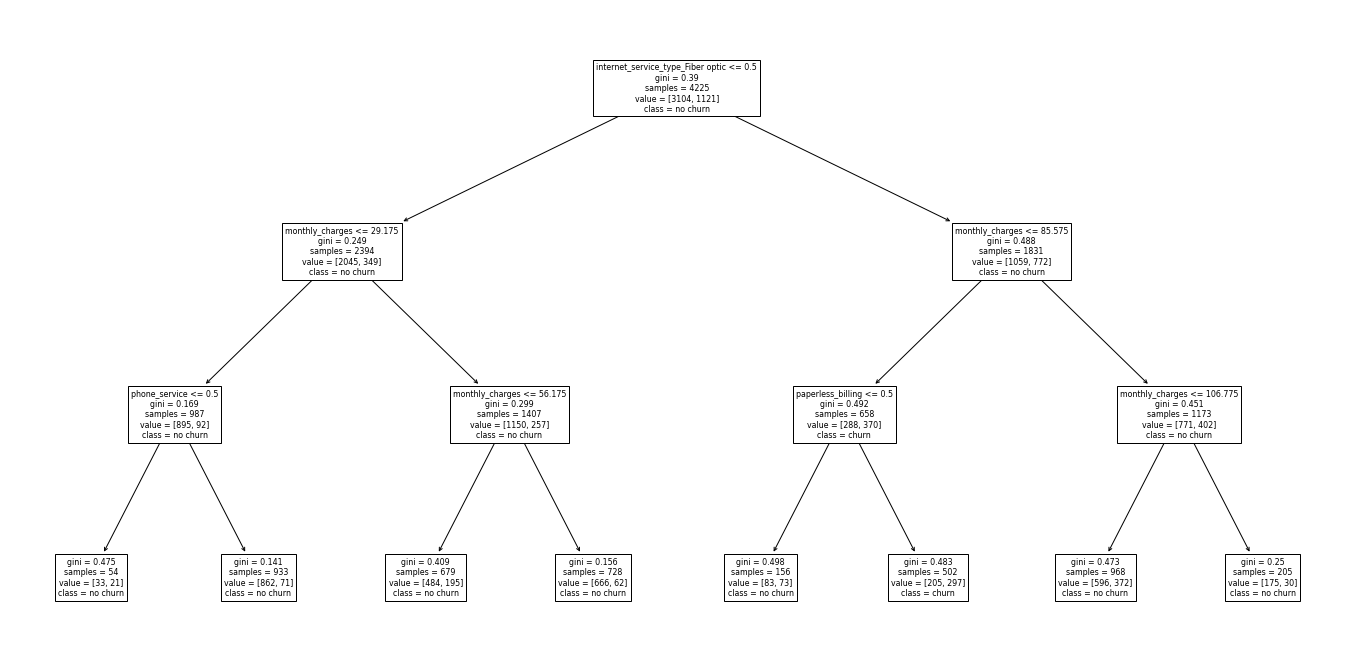

In [39]:
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train_telco.columns.to_list(), class_names=['no churn', 'churn']);

In [48]:
y_pred = model1.predict(X_validate_telco)
confusion_matrix(y_validate_telco, y_pred)

array([[961,  74],
       [282,  92]])

In [40]:
TN = 961
FP = 74
FN = 282
TP = 92
# Recall or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

In [41]:
print('TPR', round(TPR, 2))
print('FPR', round(FPR, 2))
print('TNR', round(TNR, 2))
print('FNR', round(FNR, 2))

TPR 0.25
FPR 0.07
TNR 0.93
FNR 0.75


In [42]:
model2 = DecisionTreeClassifier(max_depth=20, random_state=123)
model2 = model2.fit(X_train_telco, y_train_telco)
y_pred = model2.predict(X_train_telco)
y_pred_proba = model2.predict_proba(X_train_telco)
print(f'training score: {model2.score(X_train_telco, y_train_telco):.2%}')
print(f'validate score: {model2.score(X_validate_telco, y_validate_telco):.2%}')


training score: 91.74%
validate score: 70.19%


array([[861, 174],
       [246, 128]])

In [49]:
y_pred = model2.predict(X_validate_telco)
confusion_matrix(y_validate_telco, y_pred)

array([[861, 174],
       [246, 128]])

In [43]:
TN = 861
FP = 174
FN = 246
TP = 128
# Recall or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('TPR', round(TPR, 2))
print('FPR', round(FPR, 2))
print('TNR', round(TNR, 2))
print('FNR', round(FNR, 2))

TPR 0.34
FPR 0.17
TNR 0.83
FNR 0.66


## Continue working in your model file with titanic data to do the following:

### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [183]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf.fit(x_train_titanic, y_train_titanic)
print(rf.feature_importances_)
y_pred = rf.predict(x_train_titanic)
y_pred_proba = rf.predict_proba(x_train_titanic)
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(x_train_titanic, y_train_titanic)))


[0.12227721 0.4736073  0.05139423 0.35272127]
Accuracy of random forest classifier on training set: 0.93


### Evaluate your results using the model score, confusion matrix, and classification report.

### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [184]:
print(confusion_matrix(y_train_titanic, y_pred))
print(classification_report(y_train_titanic, y_pred))

[[322   7]
 [ 29 176]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       329
           1       0.96      0.86      0.91       205

    accuracy                           0.93       534
   macro avg       0.94      0.92      0.93       534
weighted avg       0.93      0.93      0.93       534



In [195]:
TN = 322
FP = 7
FN = 29
TP = 176
# Recall or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('TPR', round(TPR, 2))
print('FPR', round(FPR, 2))
print('TNR', round(TNR, 2))
print('FNR', round(FNR, 2))

TPR 0.86
FPR 0.02
TNR 0.98
FNR 0.14


In [186]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_validate_titanic, y_validate_titanic)))

Accuracy of random forest classifier on test set: 0.77


### Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [187]:
rf2 = RandomForestClassifier(min_samples_leaf=5, max_depth=3, random_state=123)
rf2.fit(x_train_titanic, y_train_titanic)
print(rf2.feature_importances_)
y_pred = rf2.predict(x_train_titanic)
y_pred_proba = rf2.predict_proba(x_train_titanic)
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf2.score(x_train_titanic, y_train_titanic)))


[0.1761489  0.18900725 0.02750026 0.60734359]
Accuracy of random forest classifier on training set: 0.83


In [188]:
print(confusion_matrix(y_train_titanic, y_pred))
print(classification_report(y_train_titanic, y_pred))

[[305  24]
 [ 69 136]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       329
           1       0.85      0.66      0.75       205

    accuracy                           0.83       534
   macro avg       0.83      0.80      0.81       534
weighted avg       0.83      0.83      0.82       534



In [196]:
TN = 305
FP = 24
FN = 69
TP = 136
# Recall or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('TPR', round(TPR, 2))
print('FPR', round(FPR, 2))
print('TNR', round(TNR, 2))
print('FNR', round(FNR, 2))

TPR 0.66
FPR 0.07
TNR 0.93
FNR 0.34


In [190]:
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf2.score(X_validate_titanic, y_validate_titanic)))

Accuracy of random forest classifier on test set: 0.78


### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



- The min_samples_leaf=1 and max_depth=10 performs better with an accuracy of 93%

### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [194]:
rf3 = RandomForestClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
rf3.fit(x_train_titanic, y_train_titanic)
print(rf3.feature_importances_)
y_pred = rf3.predict(x_train_titanic)
y_pred_proba = rf3.predict_proba(x_train_titanic)
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf3.score(x_train_titanic, y_train_titanic)))


[0.1618018  0.30451119 0.03556593 0.49812108]
Accuracy of random forest classifier on training set: 0.85


In [202]:
cm = confusion_matrix(y_train_titanic, y_pred)
print(classification_report(y_train_titanic, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       329
           1       0.90      0.70      0.79       205

    accuracy                           0.85       534
   macro avg       0.87      0.82      0.84       534
weighted avg       0.86      0.85      0.85       534



In [ ]:
def model_scores(cm):
    '''
    Function to get all model scores necessary for codeup exercises
    Accepts a confusion matrix, and prints a report with the following:
        Accuracy
        True positive rate
        False positive rate
        True negative rate
        False negative rate 
        Precision
        Recall
        f1-score
        positive support
        negative support
    '''
    
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]
    ALL = TP + FP + FN + TN
    
    print('Model stats for Random Forest with:')
   
    # accuracy
    acc = (TP + TN) / ALL
    print('Accuracy: {:.2f}'.format(acc))
    # true positive rate, also recall
    TPR = recall = TP/ (TP + FN)
    print('True Positive Rate: {:.2f}'.format(TPR))
    # false positive rate
    FPR = FP / (FP + TN)
    print('False Positive Rate: {:.2f}'.format(FPR))
    # true negative rate
    TNR = TN / (TN + FP)
    print('True Negative Rate: {:.2f}'.format(TNR))
    # false negative rate
    FNR = FN / (FN + TP)
    print('Flase Negative Rate: {:.2f}'.format(FNR))
    # precision
    precision = TP / (TP + FP)
    print('Precision: {:.2f}'.format(precision))
    # recall
    print('Recall: {:.2f}'.format(recall))
    # f1
    f1_score = 2 * (precision*recall) / (precision+recall)
    print('f1 score: {:.2f}'.format(f1_score))
    # support
    support_pos = TP + FN
    print('Positive support:',support_pos)
    support_neg = FP + TN
    print('Negative support:',support_neg)
    print('-----------------------------------------')

In [203]:
model_scores(cm)

Model stats for Random Forest with:
Accuracy: 0.85
True Positive Rate: 0.70
False Positive Rate: 0.05
True Negative Rate: 0.95
Flase Negative Rate: 0.30
Precision: 0.90
Recall: 0.70
f1 score: 0.79
Positive support: 205
Negative support: 329
-----------------------------------------
